<a href="https://colab.research.google.com/github/hannamakarova/Andvanced-Analytics-Prediction-Models/blob/main/Seasonality_Forecasting_Seasonality_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ther task is to build a linear model to forecast monthly demand for a product based on historical data for 2019-2021. You should also consider seasonality in the model to get more accurate forecasts.

The dataset contains the following variables:

Date — month of observations;

Promotion_Spend — marketing spending this month;

Demand — number of units sold (target variable).
Work plan:

Build a linear demand model without taking into account seasonality, considering only Promotion_Spend as an explanatory variable. Evaluate the quality of the model using the R2 metric, plot the forecasts, and compare with real data.

Add variables to account for seasonality:

convert Month to a dummy variable using get_dummies(); remember to remove one of the categories;

Create Fourier variables Sin_Month and Cos_Month for cyclical seasonality.

Evaluate the model quality and forecast accuracy for the seasonally adjusted model.

Compare the models. Does seasonality improve forecast quality?

In [50]:
import pandas as pd
import numpy as np


# Simulated dataset
data = pd.DataFrame({
    "Date": pd.date_range(start="2019-01-01", end="2021-12-31", freq="ME"),
    "Promotion_Spend": [300, 250, 400, 350, 450, 300, 200, 220, 270, 320, 300, 380] * 3,
    "Demand": [800, 750, 900, 850, 950, 780, 700, 720, 770, 810, 800, 880] +
              [820, 760, 920, 860, 960, 790, 710, 730, 780, 820, 810, 890] +
              [810, 740, 910, 840, 950, 770, 690, 710, 760, 800, 790, 870]
})

data.head()

,Date,Promotion_Spend,Demand
0,2019-01-31,300,800
1,2019-02-28,250,750
2,2019-03-31,400,900
3,2019-04-30,350,850
4,2019-05-31,450,950


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Getting data for model
X = data[["Promotion_Spend"]]
y = data["Demand"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


# get w_0
print("w_0:", model.intercept_)

# get coefficients
print("coefficients:", model.coef_)





MAE: 11.206549166417734
MSE: 177.28544247468594
R2: 0.9693461867112932
w_0: 484.85702300216735
coefficients: [1.0467734]


If R² ≈ 1.0 → Strong linear relationship between Promotion_Spend and Demand.

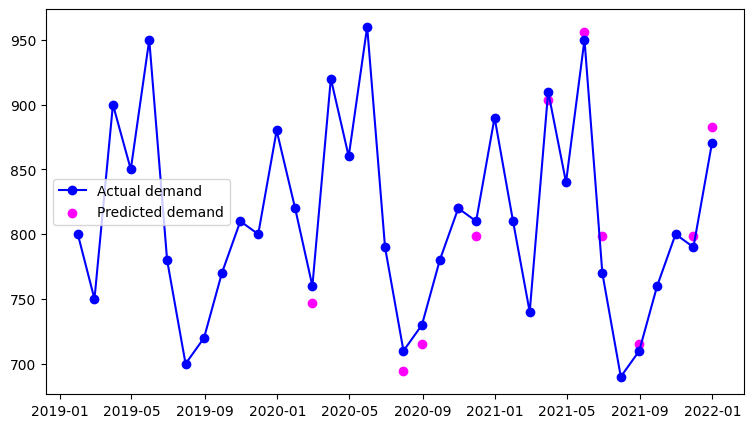

0.9693461867112932


In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(data["Date"], data["Demand"], color="blue", marker="o", label="Actual demand")
plt.scatter(data["Date"][X_test.index], y_pred, color="magenta", label="Predicted demand")
plt.legend()
plt.show()



We can see that actual data follows predicted pattern almost prfectly.



In [44]:
data["month"] = data['Date'].dt.month
data = pd.get_dummies(data, columns=["month"], drop_first = True)

# Add sine and cosine features
data["sine"] = np.sin(2 * np.pi * data["Date"].dt.month / 12)
data["cosine"] = np.cos(2 * np.pi * data["Date"].dt.month / 12)

data.head()


,Date,Promotion_Spend,Demand,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,sine,cosine
0,2019-01-31,300,800,False,False,False,False,False,False,False,False,False,False,False,0.500000,8.660254e-01
1,2019-02-28,250,750,True,False,False,False,False,False,False,False,False,False,False,0.866025,5.000000e-01
2,2019-03-31,400,900,False,True,False,False,False,False,False,False,False,False,False,1.000000,6.123234e-17
3,2019-04-30,350,850,False,False,True,False,False,False,False,False,False,False,False,0.866025,-5.000000e-01
4,2019-05-31,450,950,False,False,False,True,False,False,False,False,False,False,False,0.500000,-8.660254e-01


In [47]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = pd.concat([data['Promotion_Spend'], data.loc[:, 'month_2':'cosine']], axis=1)
y = data['Demand']

# Train-test split
X_train, X_test, y_train, y_test = X[:24], X[-12:], y[:24], y[-12:]

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R2: 0.9696146245059298


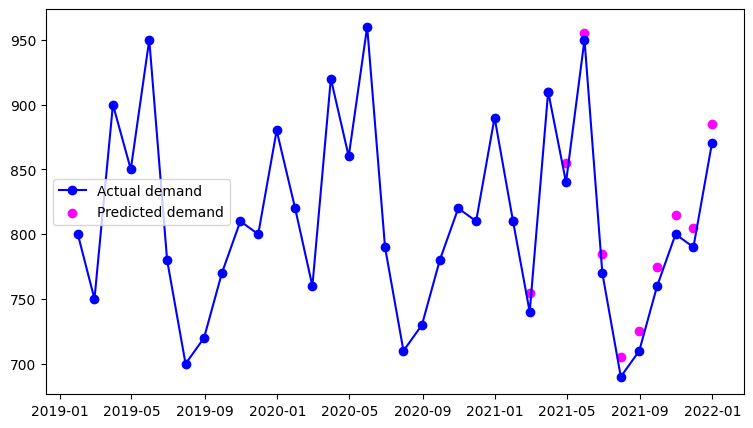

In [48]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print('R2:', r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(9, 5))
plt.plot(data['Date'], data['Demand'], color='blue', marker='o', label="Actual demand")
plt.scatter(data['Date'][X_test.index], y_pred, color='magenta', label="Predicted demand")
plt.legend()
plt.show()

The quality of the model, taking into account seasonality, has improved compared to the previous model. Forecasts have become more accurate, and R2=0.97.